In [1]:
# title: viz_osmand_stats.ipynb
# visualises osm andhra pradesh growth via osmand stats
# input:  "data/osmand_ap_stats.csv"

# output: visualisation as a line chart

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
import wayback
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
# read "data/amenity_fuel_df.csv"
# Path to your CSV file (change 'data.csv' to your file name or path)
file_path=Path("data/osmand_ap_stats.csv")
df = pd.read_csv(file_path)

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)

    # Display the first 5 rows of the DataFrame
    print("DataFrame successfully loaded:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame successfully loaded:
                                  File        Date  Size  \
0  India_andhra-pradesh_asia_2.obf.zip  25.07.2015   9.5   
1  India_andhra-pradesh_asia_2.obf.zip  04.11.2015  10.3   
2  India_andhra-pradesh_asia_2.obf.zip  01.05.2016  15.3   
3  India_andhra-pradesh_asia_2.obf.zip  01.08.2016  17.0   
4  India_andhra-pradesh_asia_2.obf.zip  01.10.2016  17.4   

                                         Description  
0  Map, Roads, POI, Transport, Address data for I...  
1  Map, Roads, POI, Transport, Address data for I...  
2  Map, Roads, POI, Transport, Address data for I...  
3  Map, Roads, POI, Transport, Address data for I...  
4  Map, Roads, POI, Transport, Address data for I...  


In [4]:
stats_file=df.loc[0,'File']
stats_desc=df.loc[0,'Description']


In [5]:
#cleanup data
# convert 'Date' to python data_time object
df['Date']=df['Date'].astype('str')
df['ts']=pd.to_datetime(df['Date'],format='%d.%m.%Y')
df.set_index('ts', inplace=True)
#drop unneeeded columns
df = df.drop(['File','Date', 'Description'], axis=1)
df.head()


,Size
ts,
2015-07-25,9.5
2015-11-04,10.3
2016-05-01,15.3
2016-08-01,17.0
2016-10-01,17.4


In [15]:
# Resample the data to a yearly frequency using the mean (adjust aggregation as needed)
yearly_data = df.resample('YE').mean()
# Calculate the fractional change between consecutive years
yearly_growth_fraction = yearly_data.pct_change(periods=1)

# Optional: Convert fractional change to percentage
yearly_growth_percent = yearly_growth_fraction * 100
yearly_growth_percent.rename(columns={'Size': 'pct_growth'}, inplace=True)
yearly_growth_percent= yearly_growth_percent.iloc[1:]
median_pct_growth_yoy=round(yearly_growth_percent['pct_growth'].median(),0).astype('int')
median_pct_growth_yoy

np.int64(28)

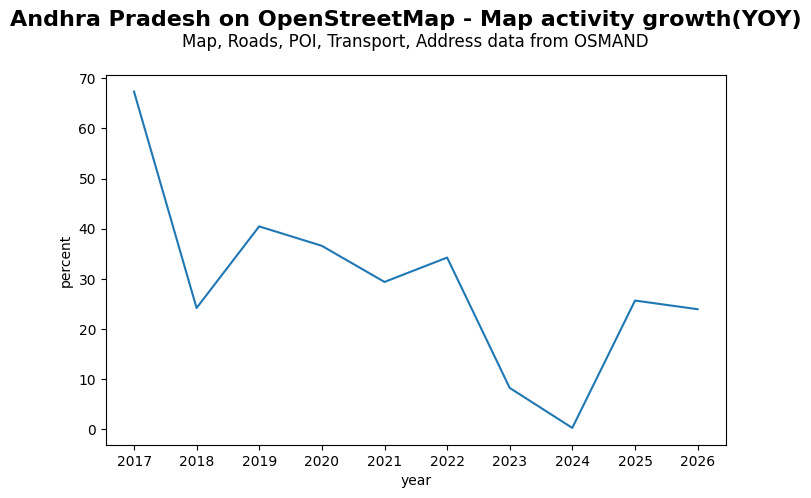

In [16]:
# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
ax.plot(yearly_growth_percent.index, yearly_growth_percent['pct_growth'])

# Add the main title (figure-level)
fig.suptitle('Andhra Pradesh on OpenStreetMap - Map activity growth(YOY)', fontsize=16, fontweight='bold')

# Add the subtitle (axes-level)
ax.set_title(f'Map, Roads, POI, Transport, Address data from OSMAND', fontsize=12, pad=20)

# Optional: Adjust layout to prevent overlapping text
plt.subplots_adjust(top=0.85)

# Add axis labels
ax.set_xlabel('year')
ax.set_ylabel('percent')
plt.savefig("data/ap-map-activity.png")
plt.show()



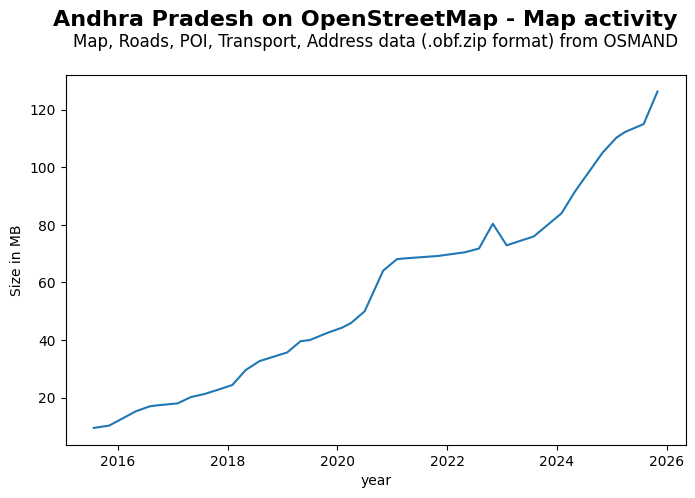

In [18]:
# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
ax.plot(df.index, df['Size'])

# Add the main title (figure-level)
fig.suptitle('Andhra Pradesh on OpenStreetMap - Map activity', fontsize=16, fontweight='bold')

# Add the subtitle (axes-level)
ax.set_title(f'Map, Roads, POI, Transport, Address data (.obf.zip format) from OSMAND', fontsize=12, pad=20)

# Optional: Adjust layout to prevent overlapping text
plt.subplots_adjust(top=0.85)

# Add axis labels
ax.set_xlabel('year')
ax.set_ylabel('Size in MB')
plt.savefig("data/ap-map-activity-growth-yoy.png")
plt.show()